## Caso em análise:

### 1 - Aplicação de modelo de regressão logística para analisar probabilidade de compra de imóvel com base nos dados fornecidos pelos clientes de um corretora fictícia.

### Resultado esperado: Após o input dos dados os corretores serão capazes de visualizar a chance de venda do imóvel para cada cliente analisado.

In [1]:
#Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando a base de estudos (dados)

base_dados = pd.read_excel('BaseDados_RegressaoLogistica.xlsx','Plan1')

In [3]:
# Visualizando o cabeçalho

base_dados.head(5)

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0


In [4]:
# Visualizando a "cauda" da tabela 

base_dados.tail(5)

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
95,96,3238,1,2,0
96,97,10701,1,2,1
97,98,14732,1,2,0
98,99,4790,1,2,1
99,100,14026,2,2,1


In [5]:
# Resumo dos dados na tabela

base_dados.describe()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
count,100.000000,100.00000,100.000000,100.00000,100.000000
mean,50.500000,8520.77000,1.400000,1.85000,0.640000
std,29.011492,4039.01965,0.710669,0.35887,0.482418
min,1.000000,1643.00000,1.000000,1.00000,0.000000
25%,25.750000,5455.25000,1.000000,2.00000,0.000000
50%,50.500000,8824.00000,1.000000,2.00000,1.000000
75%,75.250000,12036.00000,2.000000,2.00000,1.000000
max,100.000000,14994.00000,3.000000,2.00000,1.000000


In [6]:
# Descrição dos tipos de dados na tabela

base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id Cliente     100 non-null    int64
 1   Renda          100 non-null    int64
 2   Tipo Renda     100 non-null    int64
 3   Possui Imóvel  100 non-null    int64
 4   Comprou?       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


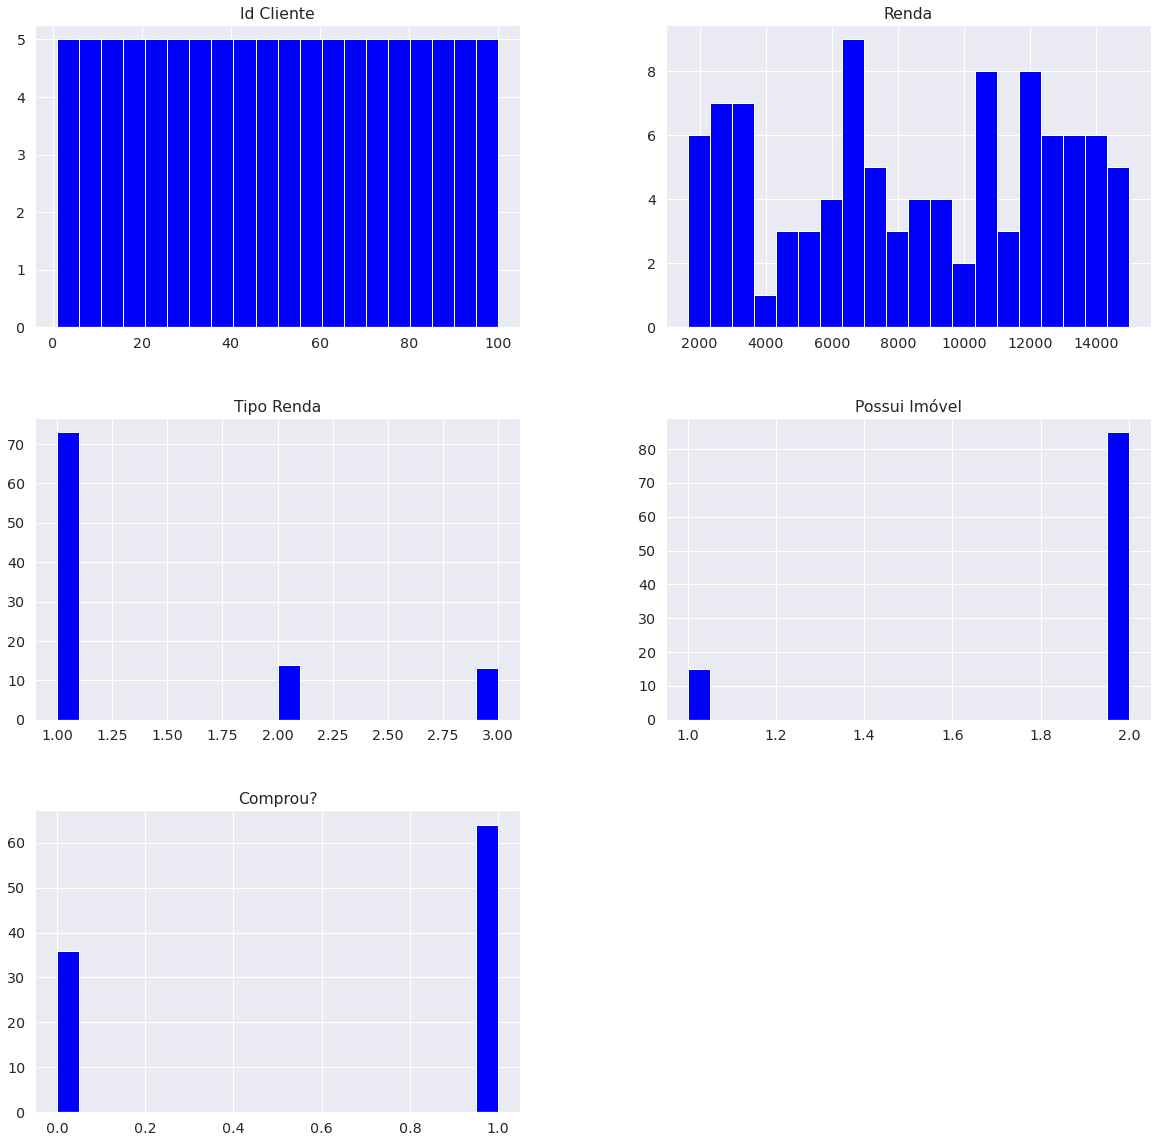

In [7]:
# Explração dos dados na tabela

sns.set(font_scale=1.3, rc={'figure.figsize':(20,20)})
eixo = base_dados.hist(bins=20,color='blue');

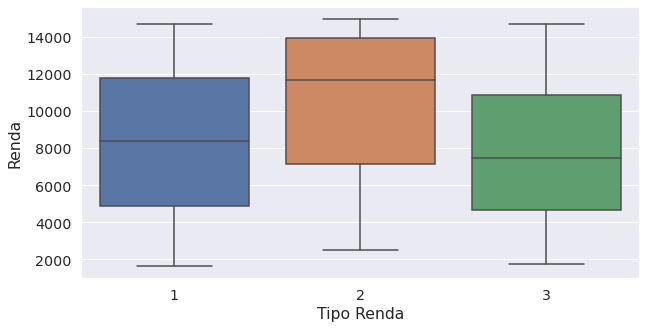

In [8]:
# Visualização dos tipos de renda

plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='Tipo Renda', y='Renda');

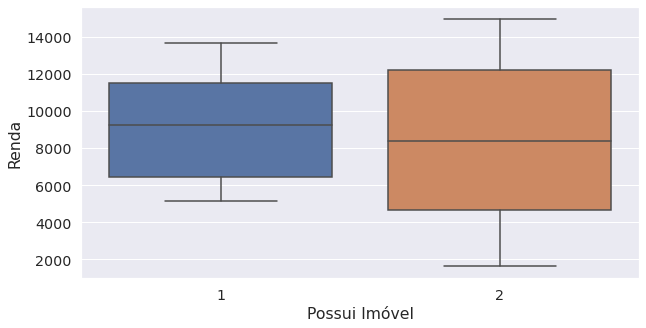

In [9]:
# Se possuem imóveis ou não

plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='Possui Imóvel', y='Renda');

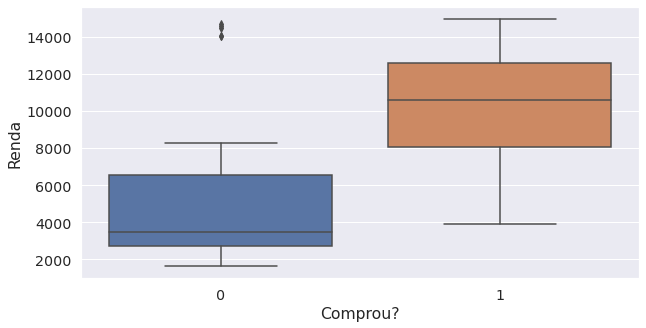

In [10]:
# Quem comprou imóvel

plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='Comprou?', y='Renda');

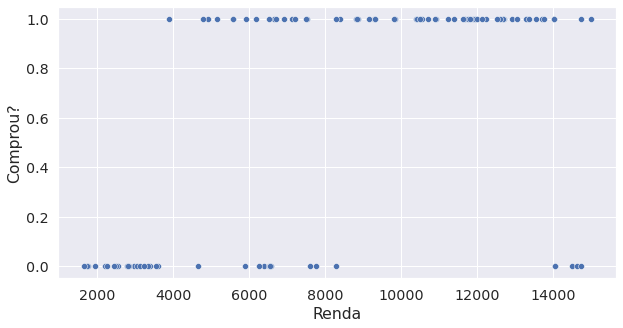

In [11]:
# Distribuição dos dados

plt.figure(figsize=(10,5))
sns.scatterplot(data=base_dados, x='Renda', y='Comprou?');

In [12]:
#Selecionando os dados e transformando-os em arrays

caracteristica = base_dados.iloc[:,1:4].values
previsor = base_dados.iloc[:,4:5].values

In [13]:
# Fatiando os dados para treino do modelo 80/20

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(caracteristica, previsor, test_size=0.20)

In [14]:
# visualizando o corte dos dados

print(len(x_treino))
print(len(x_teste))

80
20


In [19]:
from sklearn.linear_model import LogisticRegression

funcao_logistica = LogisticRegression()
funcao_logistica.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
previsoes = funcao_logistica.predict(x_teste)

In [21]:
previsoes

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [25]:
# Gerando a matriz de confusão para análise de assertividade do modelo

from sklearn.metrics import confusion_matrix

confusion_matrix(y_teste, previsoes)

array([[ 6,  2],
       [ 2, 10]])

In [26]:
# Segunda análise de assertividade do moedelo

from sklearn.metrics import classification_report

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.83      0.83      0.83        12

    accuracy                           0.80        20
   macro avg       0.79      0.79      0.79        20
weighted avg       0.80      0.80      0.80        20



In [27]:
#Testando modelo com novo cliente*

Salario = 4500
Tipo_Renda = 1
Possui_imovel = 1

parametro = [[Salario, Tipo_Renda, Possui_imovel]]

fazendo_previsao = funcao_logistica.predict(parametro)
probabilidade = funcao_logistica.predict_proba(parametro)

if fazendo_previsao == 0:
  print('Deu ruim')
  print(probabilidade)
else:
  print('Fechou ! \o/')
  print(probabilidade)

Fechou ! \o/
[[0.45671719 0.54328281]]


In [28]:
#Testando modelo com novo cliente 2*

Salario = 8500
Tipo_Renda = 0
Possui_imovel = 0

parametro = [[Salario, Tipo_Renda, Possui_imovel]]

fazendo_previsao = funcao_logistica.predict(parametro)
probabilidade = funcao_logistica.predict_proba(parametro)

if fazendo_previsao == 0:
  print('Deu ruim')
  print(probabilidade)
else:
  print('Fechou ! \o/')
  print(probabilidade)

Fechou ! \o/
[[0.07517247 0.92482753]]


In [29]:
#Testando modelo com novo cliente 3*

Salario = 2500
Tipo_Renda = 3
Possui_imovel = 0

parametro = [[Salario, Tipo_Renda, Possui_imovel]]

fazendo_previsao = funcao_logistica.predict(parametro)
probabilidade = funcao_logistica.predict_proba(parametro)

if fazendo_previsao == 0:
  print('Deu ruim')
  print(probabilidade)
else:
  print('Fechou ! \o/')
  print(probabilidade)

Deu ruim
[[0.66693155 0.33306845]]
